In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics#sso lieu
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [4]:
path = 'glass.csv'
df = pd.read_csv(path)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.shape

(214, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
dict = {}
for i in list(df.columns):
  dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict , index=['count']).transpose()

,count
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type,6


In [9]:
df.isnull().sum().sort_values(ascending=False)* 100.00

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

In [10]:
df.corr()['Type'].sort_values()

Mg     -0.744993
Fe     -0.188278
RI     -0.164237
K      -0.010054
Ca      0.000952
Si      0.151565
Na      0.502898
Ba      0.575161
Al      0.598829
Type    1.000000
Name: Type, dtype: float64

Text(0.5, 1.0, 'Heatmap')

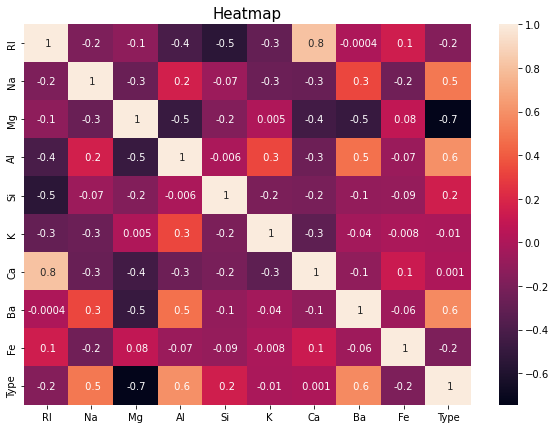

In [11]:
plt.figure(figsize= (10,7))
sns.heatmap(df.corr(), annot = True, fmt= ' .1g')
plt.title("Heatmap",fontsize=15)

In [12]:
len(df)-len(df.drop_duplicates())

1

In [13]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

Distributions

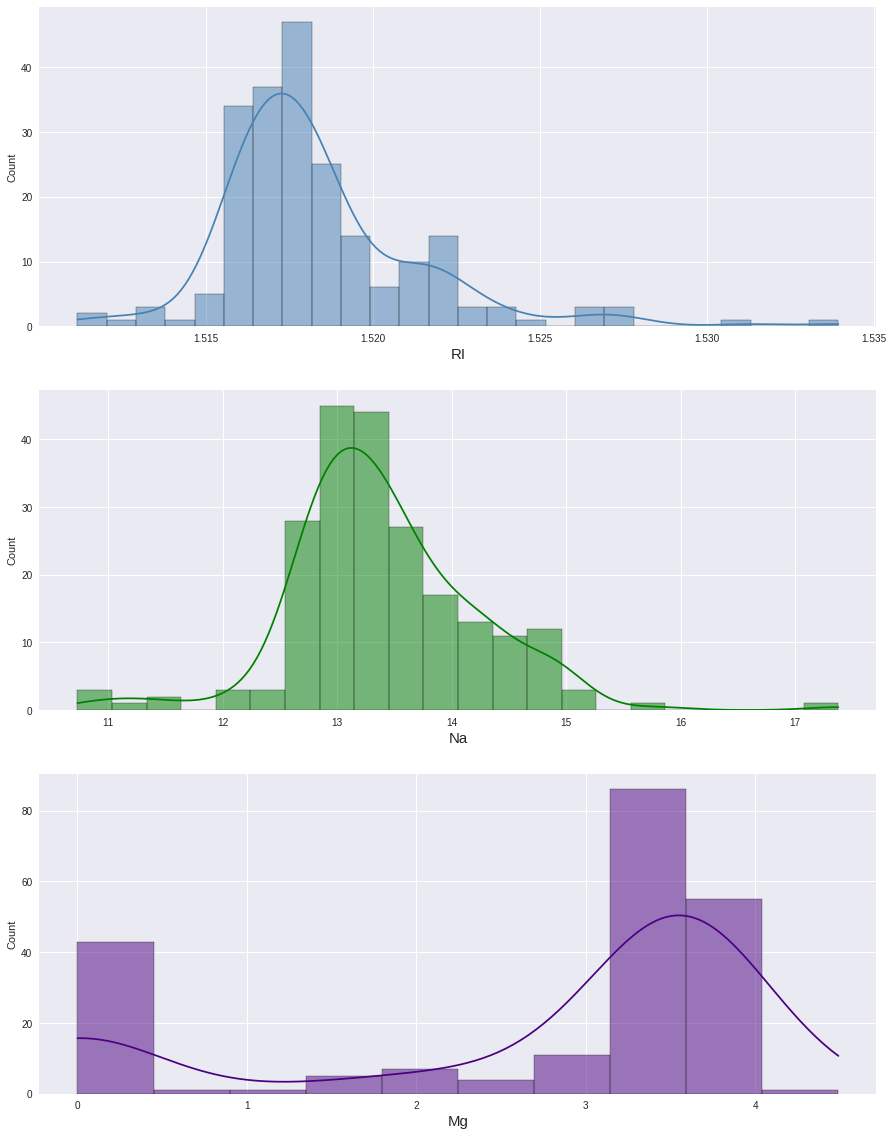

In [123]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,20)) 


sns.histplot(x = df["RI"], kde=True, ax=ax[0], color="steelblue");
ax[0].set_xlabel("RI",fontsize=15);



sns.histplot(x = df["Na"], kde=True, ax=ax[1], color="green");
ax[1].set_xlabel("Na",fontsize=15);

sns.histplot(x = df["Mg"], kde=True, ax=ax[2], color="indigo");
ax[2].set_xlabel("Mg",fontsize=15);

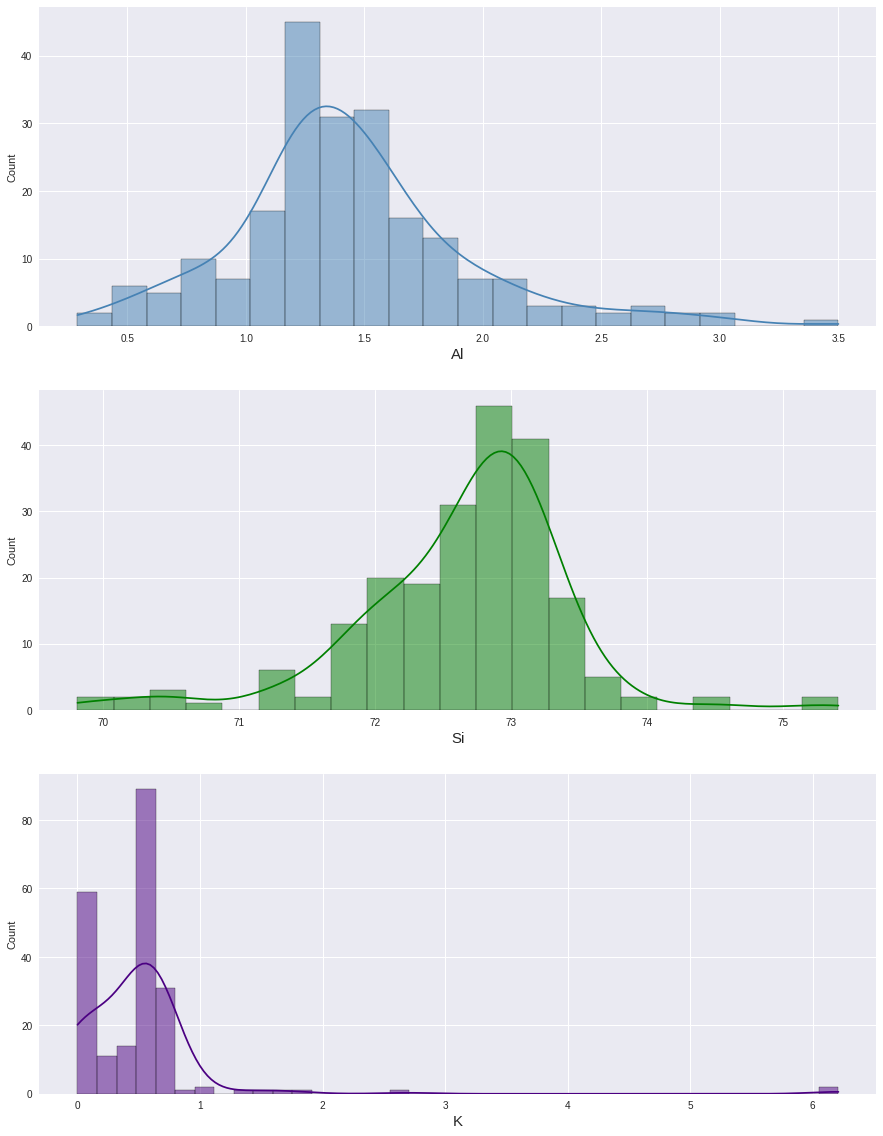

In [125]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,20)) 


sns.histplot(x = df["Al"], kde=True, ax=ax[0], color="steelblue");
ax[0].set_xlabel("Al",fontsize=15);

sns.histplot(x = df["Si"], kde=True, ax=ax[1], color="green");
ax[1].set_xlabel("Si",fontsize=15);

sns.histplot(x = df["K"], kde=True, ax=ax[2], color="indigo");
ax[2].set_xlabel("K",fontsize=15);

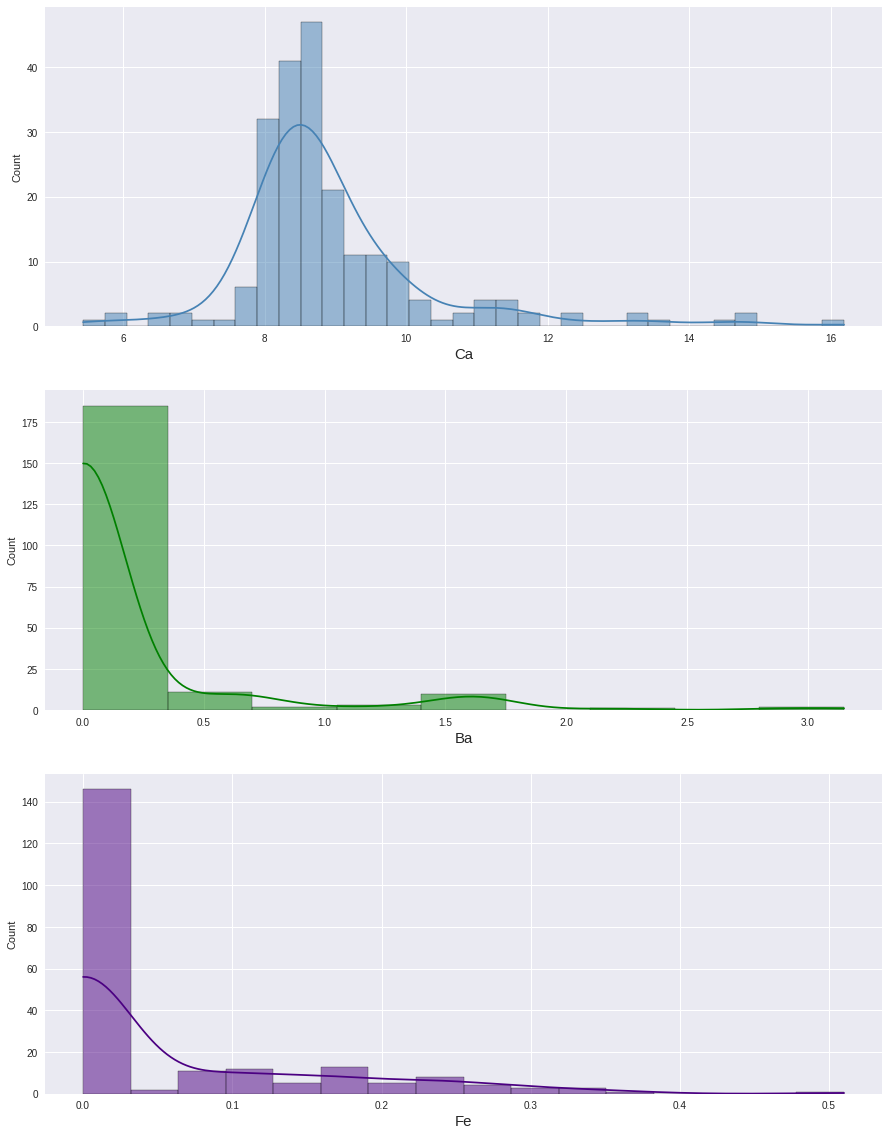

In [124]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,20)) 


sns.histplot(x = df["Ca"], kde=True, ax=ax[0], color="steelblue");
ax[0].set_xlabel("Ca",fontsize=15);

sns.histplot(x = df["Ba"], kde=True, ax=ax[1], color="green");
ax[1].set_xlabel("Ba",fontsize=15);

sns.histplot(x = df["Fe"], kde=True, ax=ax[2], color="indigo");
ax[2].set_xlabel("Fe",fontsize=15);

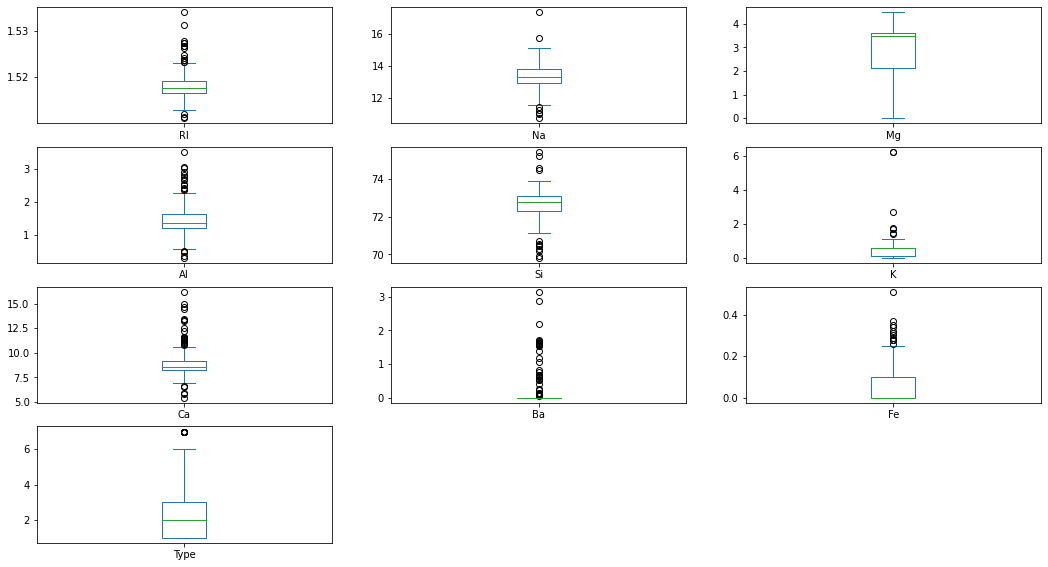

In [15]:
df.plot(kind = "box" , subplots = True , figsize = (18,15) , layout =(6,3))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b25936990>,
      dtype=object)

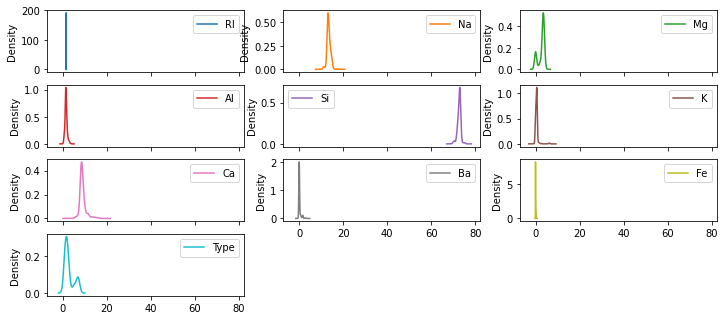

In [16]:
df.plot(kind = "density" , subplots = True , figsize = (12,8) , layout = (6,3))

In [17]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

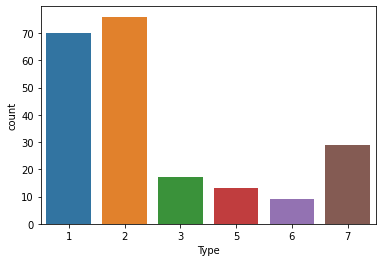

In [18]:
sns.countplot(x='Type', data=df)

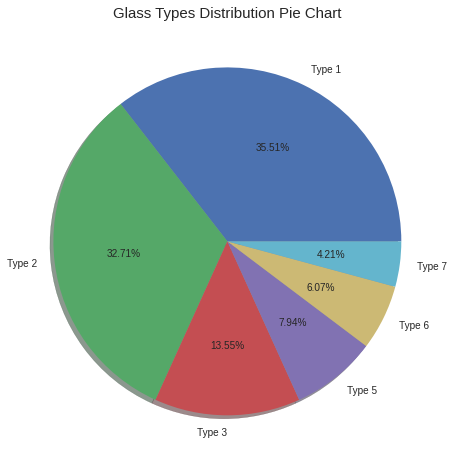

In [120]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10,8))

plt.pie(x=df["Type"].value_counts(), 
        labels=["Type 1", "Type 2", "Type 3", "Type 5", "Type 6", "Type 7"],
        shadow = True, 
        autopct="%1.2f%%", 
        )
plt.title("Glass Types Distribution Pie Chart",fontsize=15)
plt.show()

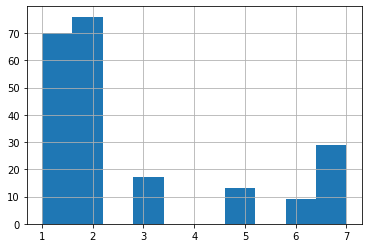

In [19]:
df['Type'].hist(bins=10)
plt.show()

In [20]:
le = LabelEncoder()

In [21]:
Activity_le=LabelEncoder()
df['Type'] = Activity_le.fit_transform(df['Type'])
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,5
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,5
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,5
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,5


In [22]:
X =df.drop(['Type'], axis = 1).values
y = df['Type'].values


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,5
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,5
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,5
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,5


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
print("shape of X_train:",X_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of X_train: (171, 9)
shape of X_test: (43, 9)
shape of y_train: (171,)
shape of y_test: (43,)


In [25]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [26]:
dt = DecisionTreeClassifier(max_depth = 5, max_features= 7)

In [27]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=7)

In [28]:
dt.score(X_train, y_train)

0.8011695906432749

In [29]:
dt.score(X_test, y_test)

0.7209302325581395

In [30]:
dt_pred = dt.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dt_pred)
print(cm)

[[10  1  0  0  0  0]
 [ 7  7  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0  8]]


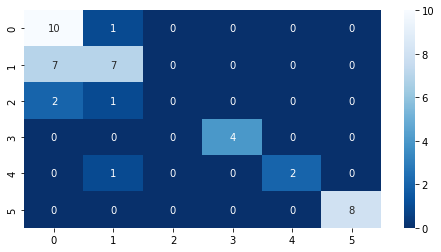

In [32]:
plt.figure(figsize = (8,4))
sns.heatmap(cm , annot = True, cmap="Blues_r")

[Text(0.6654411764705882, 0.9166666666666666, 'X[7] <= 0.314\ngini = 0.724\nsamples = 171\nvalue = [59, 62, 14, 9, 6, 21]'),
 Text(0.4485294117647059, 0.75, 'X[3] <= 0.005\ngini = 0.672\nsamples = 150\nvalue = [58, 61, 14, 8, 6, 3]'),
 Text(0.23529411764705882, 0.5833333333333334, 'X[2] <= -0.007\ngini = 0.603\nsamples = 94\nvalue = [52, 26, 11, 1, 2, 2]'),
 Text(0.11764705882352941, 0.4166666666666667, 'X[1] <= 0.505\ngini = 0.514\nsamples = 12\nvalue = [0, 8, 0, 1, 2, 1]'),
 Text(0.058823529411764705, 0.25, 'X[3] <= -0.079\ngini = 0.37\nsamples = 9\nvalue = [0, 7, 0, 1, 0, 1]'),
 Text(0.029411764705882353, 0.08333333333333333, 'gini = 0.219\nsamples = 8\nvalue = [0, 7, 0, 0, 0, 1]'),
 Text(0.08823529411764706, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.17647058823529413, 0.25, 'X[8] <= -0.203\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 0, 0, 2, 0]'),
 Text(0.14705882352941177, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0,

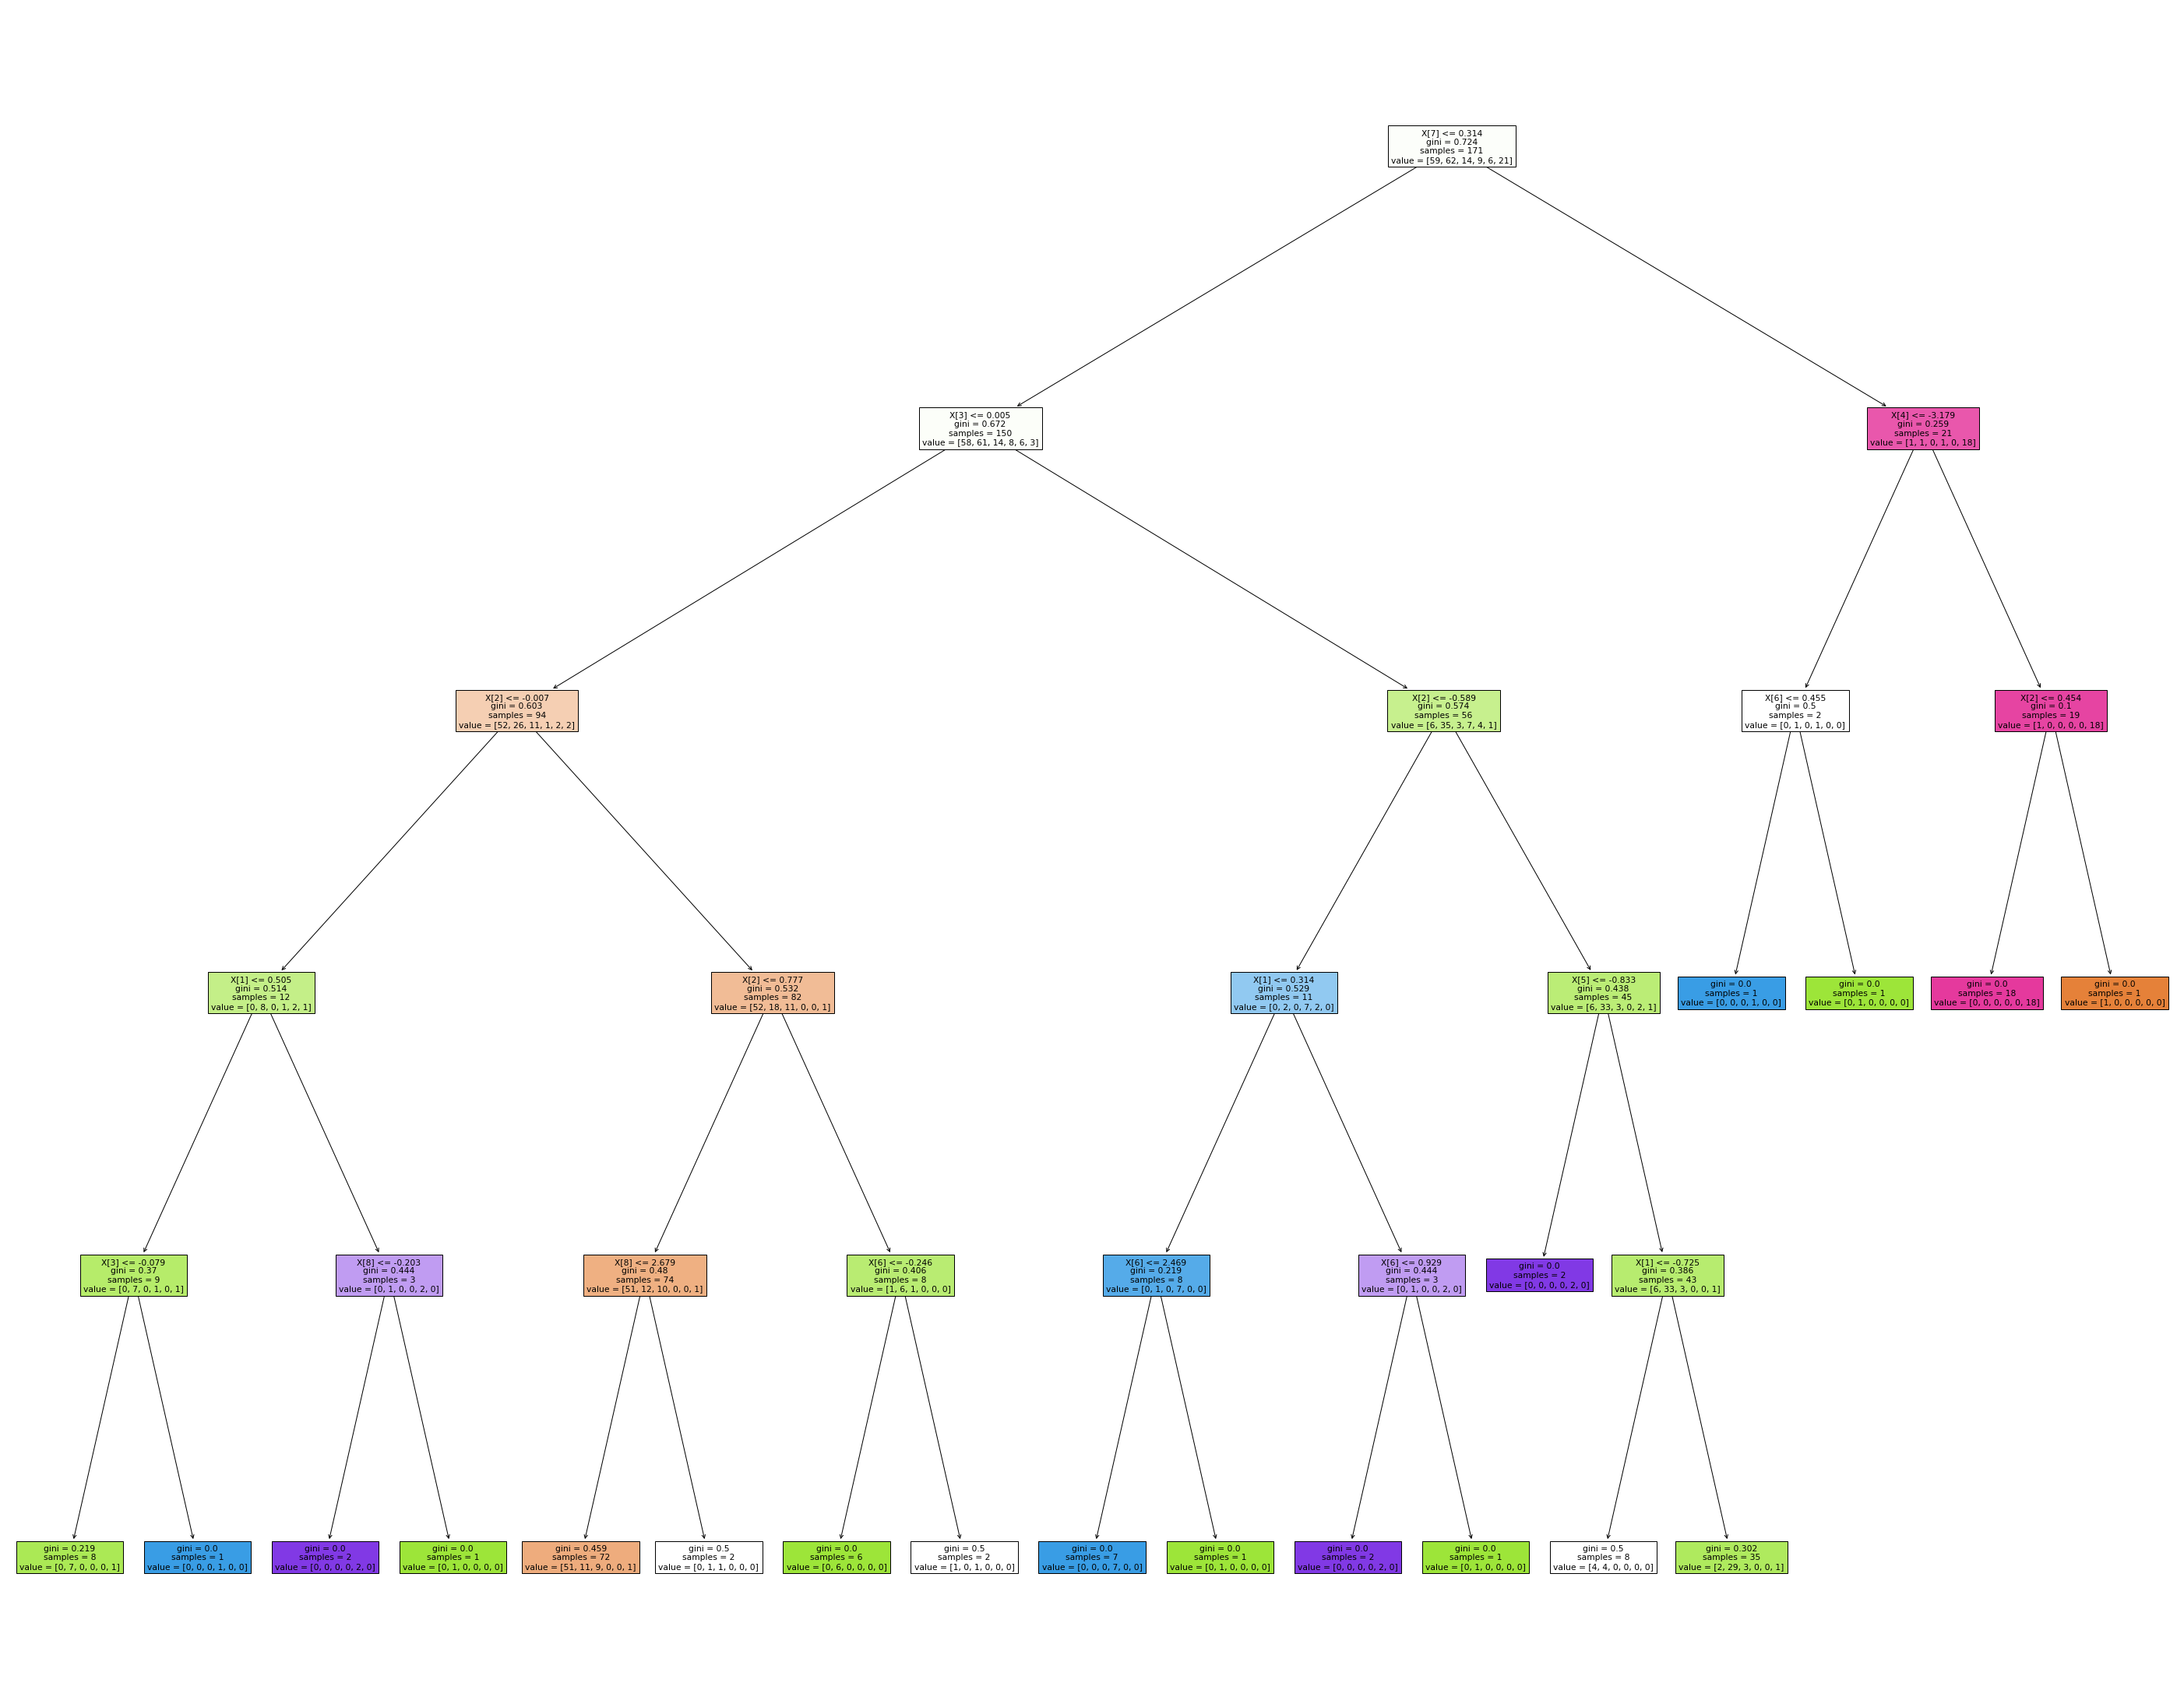

In [33]:
from sklearn import tree
fig = plt.figure(figsize = (50,40))

tree.plot_tree(dt , filled = True)

ramdomfosret

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

In [35]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass (1).csv


In [36]:
path = 'glass.csv'
df = pd.read_csv(path)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [37]:
rf = RandomForestClassifier(max_depth= 3 , max_features= 6 , random_state= 42)

In [38]:
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=3, max_features=6, random_state=42)

In [39]:
rf.score(X_train,y_train)

0.7309941520467836

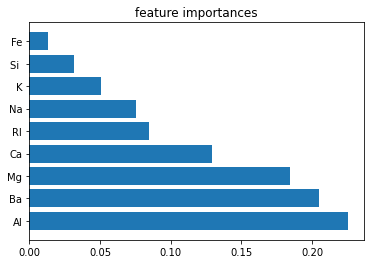

In [40]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['RI', 'Na',  'Mg', 'Al',
       'Si ', 'K', 'Ca', 'Ba', 'Fe' ]

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rf.feature_importances_), features_names, top=9)

In [41]:
rf_pred = rf.predict(X_test)

In [42]:
cm = confusion_matrix(y_test, rf_pred)
print(cm)

[[11  0  0  0  0  0]
 [ 4 10  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  1  1  0]
 [ 0  0  0  0  0  8]]


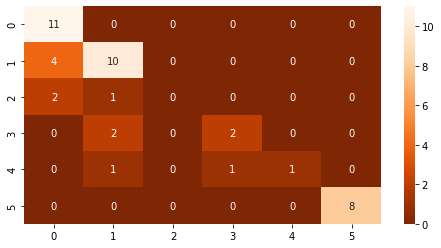

In [43]:
plt.figure(figsize = (8,4))
sns.heatmap(cm , annot = True, cmap="Oranges_r")

In [44]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


knn

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [46]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass (2).csv


In [47]:
path = 'glass.csv'
df = pd.read_csv(path)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [48]:
knn = KNeighborsClassifier(n_neighbors=5)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
print(knn.score(X_test, y_test))

0.6976744186046512


In [51]:
print(knn.score(X_train, y_train))

0.7660818713450293


In [52]:
n_neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(n_neighbors))
test_accuracy = np.empty(len(n_neighbors))
# Loop over different values of k
for i, k in enumerate(n_neighbors):
# Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(k)
# Fit the classifier to the training data
 knn.fit(X_train, y_train)
 train_accuracy[i] = knn.score(X_train,y_train)
 test_accuracy[i] = knn.score(X_test, y_test)

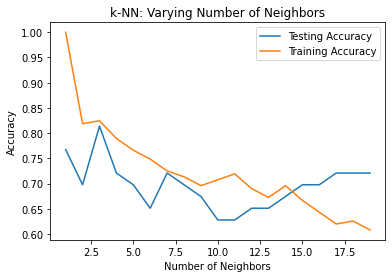

In [53]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(n_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [54]:
kn_pred = knn.predict(X_test)

In [55]:
cm = confusion_matrix(y_test, kn_pred)
print(cm)

[[11  0  0  0  0  0]
 [ 3 11  0  0  0  0]
 [ 1  2  0  0  0  0]
 [ 0  3  0  1  0  0]
 [ 1  0  0  0  0  2]
 [ 0  0  0  0  0  8]]


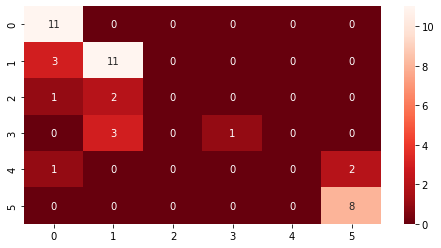

In [56]:
plt.figure(figsize = (8,4))
sns.heatmap(cm , annot = True, cmap="Reds_r")

In [81]:
accuracies = {}

In [118]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [119]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.83      0.71      0.77        14
           2       0.60      1.00      0.75         3
           3       1.00      0.75      0.86         4
           4       1.00      0.67      0.80         3
           5       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.86      0.84      0.83        43
weighted avg       0.85      0.84      0.84        43

0.8372093023255814


In [107]:
accuracy = accuracy_score(y_test, y_pred)
accuracies['Random Forest Classification'] = accuracy

print(accuracy)

0.8372093023255814


In [108]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [109]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.89      0.57      0.70        14
           2       0.67      0.67      0.67         3
           3       1.00      0.75      0.86         4
           4       0.50      0.67      0.57         3
           5       0.88      0.88      0.88         8

    accuracy                           0.74        43
   macro avg       0.76      0.74      0.73        43
weighted avg       0.79      0.74      0.74        43

0.7441860465116279


In [110]:
accuracy = accuracy_score(y_test, y_pred)
accuracies['Decision Tree Classification'] = accuracy

print( accuracy)

0.7441860465116279


In [111]:
from sklearn.neighbors import KNeighborsClassifier

# metric = 'minkowski', p = 2 means Euclidean distance.
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.62      0.57      0.59        14
           2       0.00      0.00      0.00         3
           3       0.50      0.25      0.33         4
           4       1.00      1.00      1.00         3
           5       0.89      1.00      0.94         8

    accuracy                           0.70        43
   macro avg       0.60      0.62      0.60        43
weighted avg       0.64      0.70      0.66        43

0.6976744186046512


In [112]:
accuracy = accuracy_score(y_test, y_pred)
accuracies['K-NN'] = accuracy

print(accuracy)

0.6976744186046512


In [116]:
accuracy_df  = pd.DataFrame(list(accuracies.items()),columns = ['Model Name', 'Accuracy Score']) 
accuracy_df

,Model Name,Accuracy Score
0,Random Forest Classification,0.837209
1,Decision Tree Classification,0.744186
2,K-NN,0.697674


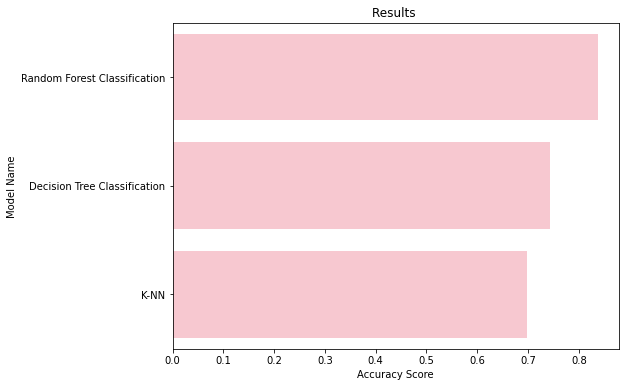

In [115]:
f, ax = plt.subplots(figsize = (8,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'Model Name', x = 'Accuracy Score', data = accuracy_df, color = 'pink')
plt.title("Results ")
plt.show()

In [90]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.62      0.57      0.59        14
           2       0.00      0.00      0.00         3
           3       0.50      0.25      0.33         4
           4       1.00      1.00      1.00         3
           5       0.89      1.00      0.94         8

    accuracy                           0.70        43
   macro avg       0.60      0.62      0.60        43
weighted avg       0.64      0.70      0.66        43

0.6976744186046512


In [101]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.78      0.50      0.61        14
           2       0.75      1.00      0.86         3
           3       1.00      0.25      0.40         4
           4       0.75      1.00      0.86         3
           5       0.73      1.00      0.84         8

    accuracy                           0.74        43
   macro avg       0.79      0.78      0.73        43
weighted avg       0.77      0.74      0.72        43

0.7441860465116279
